In [752]:
import numpy as np
import geopandas as  gpd
import matplotlib.pyplot as plt
import pandas as pd

In [753]:
counties_gdf = gpd.read_file('cb_2018_us_county_500k/cb_2018_us_county_500k.shp')
cities_gdf = gpd.read_file('cities/citiesx010g.shp')

In [754]:
counties_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


In [755]:
cities_gdf.dtypes

GNIS_ID        float64
ANSICODE        object
FEATURE         object
FEATURE2        object
NAME            object
POP_2010       float64
COUNTY          object
COUNTYFIPS      object
STATE           object
STATE_FIPS      object
LATITUDE       float64
LONGITUDE      float64
PopPlLat       float64
PopPlLong      float64
ELEV_IN_M      float64
ELEV_IN_FT     float64
geometry      geometry
dtype: object

# Part: Load and prepare the geopandas dataframes

In [756]:
cities_gdf_final = cities_gdf.loc[cities_df['STATE'].isin(['IA', 'SD', 'IL', 'MN','IN'])]
cities_gdf_final.head()

,GNIS_ID,ANSICODE,FEATURE,FEATURE2,NAME,POP_2010,COUNTY,COUNTYFIPS,STATE,STATE_FIPS,LATITUDE,LONGITUDE,PopPlLat,PopPlLong,ELEV_IN_M,ELEV_IN_FT,geometry
191,644967.0,664474,Civil,-999,Hill City,633.0,Aitkin,001,MN,27,46.993285,-93.598562,46.993285,-93.598562,408.0,1339.0,POINT (-93.59856 46.99328)
237,649445.0,665301,Civil,County Seat,Pine City,3123.0,Pine,115,MN,27,45.826067,-92.968542,45.826067,-92.968542,290.0,951.0,POINT (-92.96854 45.82607)
260,1256558.0,1267485,Civil,County Seat,Mound City,71.0,Campbell,021,SD,46,45.725270,-100.068452,45.725270,-100.068452,525.0,1722.0,POINT (-100.06845 45.72527)
261,1254373.0,1267329,Civil,-999,Claremont,127.0,Brown,013,SD,46,45.671898,-98.015660,45.671898,-98.015660,397.0,1302.0,POINT (-98.01566 45.67190)
262,1265162.0,1267335,Civil,-999,Columbia,136.0,Brown,013,SD,46,45.613024,-98.312598,45.613024,-98.312598,397.0,1302.0,POINT (-98.31260 45.61302)


In [757]:
cities_gdf_final = cities_gdf_final.drop(['COUNTY', 'COUNTYFIPS'],axis=1)
cities_gdf_final = cities_gdf_final.loc[cities_gdf_final.FEATURE == 'Civil']

In [758]:
cities_df_final.head()
len(cities_df_final)

3971

In [759]:
# Counties data only for ['IA', 'SD', 'IL', 'MN','IN']

# This code finds out fips for that 5 cities
fips_for_five_cities = cities_df_final.STATE_FIPS.unique()

#counties data for that 5 cities
counties_gdf_final = counties_df.loc[counties_df.STATEFP.isin(list(fips_for_five_cities))]
counties_gdf_final.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,area
11,17,091,00424247,0500000US17091,17091,Kankakee,06,1752121058,12440760,"POLYGON ((-88.25150 41.11422, -88.24089 41.114...",2.344934e+09
12,17,187,01785134,0500000US17187,17187,Warren,06,1404747944,1674135,"POLYGON ((-90.78965 40.63685, -90.78956 40.642...",1.860974e+09
13,17,197,01785190,0500000US17197,17197,Will,06,2164927644,34548925,"POLYGON ((-88.26127 41.72466, -88.25477 41.724...",2.936824e+09
14,18,027,00450343,0500000US18027,18027,Daviess,06,1112374406,19124393,"POLYGON ((-87.27917 38.69394, -87.27262 38.696...",1.451989e+09
15,18,061,00451677,0500000US18061,18061,Harrison,06,1254889433,5193186,"POLYGON ((-86.32768 38.18274, -86.32441 38.182...",1.606033e+09


# Part: compute the area of each county

In [760]:
counties_projeted_gdf = counties_gdf_final.copy()
counties_projeted_gdf['geometry'] = counties_projeted_gdf.geometry.to_crs('epsg:4087')
counties_projeted_gdf['area'] = counties_projeted_gdf.area

# Part: inspect the projected and unprojected county geometry

In [761]:
STATE_FIPS_IA = cities_df.loc[cities_gdf.STATE == 'IA','STATE_FIPS'].unique()[0]

In [762]:
unprojected_counties_IA = counties_gdf_final.loc[counties_gdf_final.STATEFP==STATE_FIPS_IA]
unprojected_counties_IA.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,area
97,19,175,00465276,0500000US19175,19175,Union,06,1097235806,5575853,"POLYGON ((-94.47101 41.04705, -94.47075 41.057...",1.463037e+09
148,19,001,00465190,0500000US19001,19001,Adair,06,1474404193,2597996,"POLYGON ((-94.70072 41.46725, -94.70057 41.482...",1.968695e+09
149,19,045,00465211,0500000US19045,19045,Clinton,06,1799818638,39526958,"POLYGON ((-90.89894 41.91853, -90.89807 41.920...",2.473108e+09
150,19,083,00465230,0500000US19083,19083,Hardin,06,1474505075,1776735,"POLYGON ((-93.49948 42.55770, -93.48076 42.557...",1.999792e+09
151,19,111,00465244,0500000US19111,19111,Lee,06,1340448548,55266733,"POLYGON ((-91.71879 40.81354, -91.68010 40.813...",1.840938e+09


<AxesSubplot:>

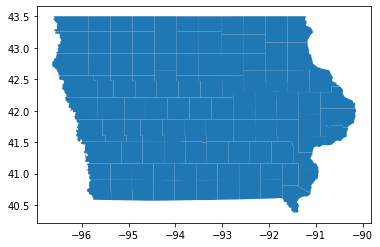

In [763]:
unprojected_counties_IA.plot()

<AxesSubplot:>

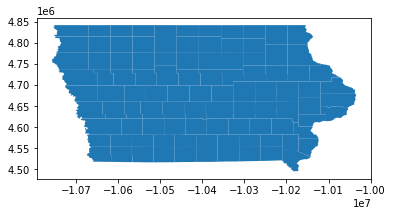

In [764]:
projected_counties_IA = counties_projeted_gdf.loc[counties_projeted_gdf.STATEFP==STATE_FIPS_IA]
projected_counties_IA.loc[counties_projeted_gdf.STATEFP==STATE_FIPS_IA].plot()

In [765]:
projected_counties_IA = projected_counties_IA.copy() 
projected_counties_IA['AREA'] = projected_counties_IA.geometry.area

# Part:Use a spatial join to determine which county each city belongs to.

In [766]:
joined_gdf = gpd.tools.sjoin(cities_gdf_final,counties_gdf_final,how='inner')
joined_gdf.head()
len(joined_gdf)

3971

In [767]:
# Converting geopandas datafrme to pandas dataframe
joined_df = pd.DataFrame(joined_gdf)

## Top 5 cities based on population

In [768]:
joined_df.sort_values(by='POP_2010',ascending=False).NAME_left[0:5]

494           Chicago
37395    Indianapolis
7830      Minneapolis
8940       Saint Paul
8261       Fort Wayne
Name: NAME_left, dtype: object

# People per sq meter in each county

In [769]:
area = counties_projeted_gdf.groupby(['STATEFP','NAME']).sum().area
len(area)

446

In [770]:
joined_df.groupby(['STATE','NAME_right']).sum()[['POP_2010']]

POP_2010
STATE NAME_right          
IA    Adair         5673.0
      Adams         2040.0
      Allamakee     8117.0
      Appanoose     8140.0
      Audubon       3529.0
...                    ...
SD    Turner        4431.0
      Union         7852.0
      Walworth      4389.0
      Yankton      15811.0
      Ziebach        525.0

[444 rows x 1 columns]

# The total population of each county

In [771]:
joined_df.groupby(['STATE','NAME_right']).sum()[['POP_2010']]

POP_2010
STATE NAME_right          
IA    Adair         5673.0
      Adams         2040.0
      Allamakee     8117.0
      Appanoose     8140.0
      Audubon       3529.0
...                    ...
SD    Turner        4431.0
      Union         7852.0
      Walworth      4389.0
      Yankton      15811.0
      Ziebach        525.0

[444 rows x 1 columns]